In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('Data_Train.csv')
df_test = pd.read_csv('Test_set.csv')
df_test_label = pd.read_csv('Sample_submission.csv')

In [4]:
df_test['Price'] = df_test_label['Price']

In [5]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544


In [6]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
 10  Price            2671 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 229.7+ KB


Airline, Date_of_Journey, Source, Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops and Additional_Info are Object type data which needs to change to Int

In [9]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Route and Total_Stops column has only 1 Null value hence we can directly remove the data since we have 10,683 data points.

In [11]:
df = df.dropna()

Have removed the NaN from the data.

In [12]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Data looks fine to encode into Int

In [13]:
df1 = df[['Airline','Source','Destination','Total_Stops','Route']]
df1_test = df_test[['Airline','Source','Destination','Total_Stops','Route']]

In [14]:
for i in df1.columns:
    if df1[i].dtypes=='object':
        df1[i]=enc.fit_transform(df1[i].values.reshape(-1,1))

In [15]:
for i in df1_test.columns:
    if df1_test[i].dtypes=='object':
        df1_test[i]=enc.fit_transform(df1_test[i].values.reshape(-1,1))

Endcoded categorical data into Int

In [16]:
df[['Airline','Source','Destination','Total_Stops','Route']] = df1
df_test[['Airline','Source','Destination','Total_Stops','Route']] = df1_test

In [17]:
df = df.drop('Additional_Info',axis=1)
df_test = df_test.drop('Additional_Info',axis=1)

Additional_Info column has 8,000 Null value and total data is 10,000 hence have not filled the NaN and have removed the Column

In [18]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,3.0,24/03/2019,0.0,5.0,18.0,22:20,01:10 22 Mar,2h 50m,4.0,3897
1,1.0,1/05/2019,3.0,0.0,84.0,05:50,13:15,7h 25m,1.0,7662
2,4.0,9/06/2019,2.0,1.0,118.0,09:25,04:25 10 Jun,19h,1.0,13882
3,3.0,12/05/2019,3.0,0.0,91.0,18:05,23:30,5h 25m,0.0,6218
4,3.0,01/03/2019,0.0,5.0,29.0,16:50,21:35,4h 45m,0.0,13302
...,...,...,...,...,...,...,...,...,...,...
10678,0.0,9/04/2019,3.0,0.0,64.0,19:55,22:25,2h 30m,4.0,4107
10679,1.0,27/04/2019,3.0,0.0,64.0,20:45,23:20,2h 35m,4.0,4145
10680,4.0,27/04/2019,0.0,2.0,18.0,08:20,11:20,3h,4.0,7229
10681,10.0,01/03/2019,0.0,5.0,18.0,11:30,14:10,2h 40m,4.0,12648


In [19]:
df[['Day','Month','Year']] = df['Date_of_Journey'].str.split('/',expand=True)
df_test[['Day','Month','Year']] = df_test['Date_of_Journey'].str.split('/',expand=True)

In [20]:
df = df.drop('Date_of_Journey',axis=1)
df_test = df_test.drop('Date_of_Journey',axis=1)

In [21]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year
0,3.0,0.0,5.0,18.0,22:20,01:10 22 Mar,2h 50m,4.0,3897,24,03,2019
1,1.0,3.0,0.0,84.0,05:50,13:15,7h 25m,1.0,7662,1,05,2019
2,4.0,2.0,1.0,118.0,09:25,04:25 10 Jun,19h,1.0,13882,9,06,2019
3,3.0,3.0,0.0,91.0,18:05,23:30,5h 25m,0.0,6218,12,05,2019
4,3.0,0.0,5.0,29.0,16:50,21:35,4h 45m,0.0,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,19:55,22:25,2h 30m,4.0,4107,9,04,2019
10679,1.0,3.0,0.0,64.0,20:45,23:20,2h 35m,4.0,4145,27,04,2019
10680,4.0,0.0,2.0,18.0,08:20,11:20,3h,4.0,7229,27,04,2019
10681,10.0,0.0,5.0,18.0,11:30,14:10,2h 40m,4.0,12648,01,03,2019


Have elaborated Date_of_Journey into three columns Day Month and Year

In [22]:
df[['Dep_Time_Hour','Dep_Time_Mint']] = df['Dep_Time'].str.split(':',expand=True)
df = df.drop('Dep_Time',axis=1)
df['Dep_Time'] = df['Dep_Time_Hour'] + '.' + df['Dep_Time_Mint']
df = df.drop(['Dep_Time_Hour','Dep_Time_Mint'],axis=1)

In [23]:
df_test[['Dep_Time_Hour','Dep_Time_Mint']] = df_test['Dep_Time'].str.split(':',expand=True)
df_test = df_test.drop('Dep_Time',axis=1)
df_test['Dep_Time'] = df_test['Dep_Time_Hour'] + '.' + df_test['Dep_Time_Mint']
df_test = df_test.drop(['Dep_Time_Hour','Dep_Time_Mint'],axis=1)

In [24]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time
0,3.0,0.0,5.0,18.0,01:10 22 Mar,2h 50m,4.0,3897,24,03,2019,22.20
1,1.0,3.0,0.0,84.0,13:15,7h 25m,1.0,7662,1,05,2019,05.50
2,4.0,2.0,1.0,118.0,04:25 10 Jun,19h,1.0,13882,9,06,2019,09.25
3,3.0,3.0,0.0,91.0,23:30,5h 25m,0.0,6218,12,05,2019,18.05
4,3.0,0.0,5.0,29.0,21:35,4h 45m,0.0,13302,01,03,2019,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,22:25,2h 30m,4.0,4107,9,04,2019,19.55
10679,1.0,3.0,0.0,64.0,23:20,2h 35m,4.0,4145,27,04,2019,20.45
10680,4.0,0.0,2.0,18.0,11:20,3h,4.0,7229,27,04,2019,08.20
10681,10.0,0.0,5.0,18.0,14:10,2h 40m,4.0,12648,01,03,2019,11.30


Have updated Dep_Time value from 22:20 to 22.20

In [25]:
df[['Arrival_Time','Arrival_Time_Date','Arrival_Time_Month']] = df['Arrival_Time'].str.split(' ',expand=True)
df = df.drop(['Arrival_Time_Date','Arrival_Time_Month'],axis=1)
df[['Arrival_Time_Hour','Arrival_Time_Mints']] = df['Arrival_Time'].str.split(':',expand=True)
df = df.drop('Arrival_Time',axis=1)
df['Arrival_Time'] = df['Arrival_Time_Hour'] + '.' + df['Arrival_Time_Mints']
df = df.drop(['Arrival_Time_Hour','Arrival_Time_Mints'],axis=1)

In [26]:
df_test[['Arrival_Time','Arrival_Time_Date','Arrival_Time_Month']] = df_test['Arrival_Time'].str.split(' ',expand=True)
df_test = df_test.drop(['Arrival_Time_Date','Arrival_Time_Month'],axis=1)
df_test[['Arrival_Time_Hour','Arrival_Time_Mints']] = df_test['Arrival_Time'].str.split(':',expand=True)
df_test = df_test.drop('Arrival_Time',axis=1)
df_test['Arrival_Time'] = df_test['Arrival_Time_Hour'] + '.' + df_test['Arrival_Time_Mints']
df_test = df_test.drop(['Arrival_Time_Hour','Arrival_Time_Mints'],axis=1)

In [27]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Day,Month,Year,Dep_Time,Arrival_Time
0,3.0,0.0,5.0,18.0,2h 50m,4.0,3897,24,03,2019,22.20,01.10
1,1.0,3.0,0.0,84.0,7h 25m,1.0,7662,1,05,2019,05.50,13.15
2,4.0,2.0,1.0,118.0,19h,1.0,13882,9,06,2019,09.25,04.25
3,3.0,3.0,0.0,91.0,5h 25m,0.0,6218,12,05,2019,18.05,23.30
4,3.0,0.0,5.0,29.0,4h 45m,0.0,13302,01,03,2019,16.50,21.35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,2h 30m,4.0,4107,9,04,2019,19.55,22.25
10679,1.0,3.0,0.0,64.0,2h 35m,4.0,4145,27,04,2019,20.45,23.20
10680,4.0,0.0,2.0,18.0,3h,4.0,7229,27,04,2019,08.20,11.20
10681,10.0,0.0,5.0,18.0,2h 40m,4.0,12648,01,03,2019,11.30,14.10


Removed written data from Arrival_Time column since there are around 6,000 NaN and kept only the time

In [28]:
df['Arrival_Time'] = df['Arrival_Time'].astype('float64')
df['Day'] = df['Day'].astype('float64')
df['Month'] = df['Month'].astype('float64')
df['Year'] = df['Year'].astype('float64')
df['Dep_Time'] = df['Dep_Time'].astype('float64')

In [29]:
df_test['Arrival_Time'] = df_test['Arrival_Time'].astype('float64')
df_test['Day'] = df_test['Day'].astype('float64')
df_test['Month'] = df_test['Month'].astype('float64')
df_test['Year'] = df_test['Year'].astype('float64')
df_test['Dep_Time'] = df_test['Dep_Time'].astype('float64')

Converted all the Object values to Float values

In [30]:
df[['Duration_Hour','Duration_Mints']] = df['Duration'].str.split('h',expand=True)
df[['Duration_Mint','test']] = df['Duration_Mints'].str.split('m',expand=True)
df=df.drop(['Duration','Duration_Mints','test'],axis=1)
df[['test','Duration_Mint']] = df['Duration_Mint'].str.split(' ',expand=True)
df['Duration_Mint'] = df['Duration_Mint'].fillna('0')
df['Duration'] = df['Duration_Hour'] + '.' + df['Duration_Mint']
df = df.drop(df.index[6474])
df['Duration'] = df['Duration'].astype('float64')
df= df.drop(['Duration_Hour','Duration_Mint','test'],axis=1)

In [31]:
df_test[['Duration_Hour','Duration_Mints']] = df_test['Duration'].str.split('h',expand=True)
df_test[['Duration_Mint','test']] = df_test['Duration_Mints'].str.split('m',expand=True)
df_test=df_test.drop(['Duration','Duration_Mints','test'],axis=1)
df_test[['test','Duration_Mint']] = df_test['Duration_Mint'].str.split(' ',expand=True)
df_test['Duration_Mint'] = df_test['Duration_Mint'].fillna('0')
df_test['Duration'] = df_test['Duration_Hour'] + '.' + df_test['Duration_Mint']
df_test = df_test.drop(df_test.index[2660])
df_test['Duration'] = df_test['Duration'].astype('float64')
df_test= df_test.drop(['Duration_Hour','Duration_Mint','test'],axis=1)

Elaborated Duration column to Float 

In [32]:
df

,Airline,Source,Destination,Route,Total_Stops,Price,Day,Month,Year,Dep_Time,Arrival_Time,Duration
0,3.0,0.0,5.0,18.0,4.0,3897,24.0,3.0,2019.0,22.20,1.10,2.50
1,1.0,3.0,0.0,84.0,1.0,7662,1.0,5.0,2019.0,5.50,13.15,7.25
2,4.0,2.0,1.0,118.0,1.0,13882,9.0,6.0,2019.0,9.25,4.25,19.00
3,3.0,3.0,0.0,91.0,0.0,6218,12.0,5.0,2019.0,18.05,23.30,5.25
4,3.0,0.0,5.0,29.0,0.0,13302,1.0,3.0,2019.0,16.50,21.35,4.45
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0.0,3.0,0.0,64.0,4.0,4107,9.0,4.0,2019.0,19.55,22.25,2.30
10679,1.0,3.0,0.0,64.0,4.0,4145,27.0,4.0,2019.0,20.45,23.20,2.35
10680,4.0,0.0,2.0,18.0,4.0,7229,27.0,4.0,2019.0,8.20,11.20,3.00
10681,10.0,0.0,5.0,18.0,4.0,12648,1.0,3.0,2019.0,11.30,14.10,2.40


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       10681 non-null  float64
 1   Source        10681 non-null  float64
 2   Destination   10681 non-null  float64
 3   Route         10681 non-null  float64
 4   Total_Stops   10681 non-null  float64
 5   Price         10681 non-null  int64  
 6   Day           10681 non-null  float64
 7   Month         10681 non-null  float64
 8   Year          10681 non-null  float64
 9   Dep_Time      10681 non-null  float64
 10  Arrival_Time  10681 non-null  float64
 11  Duration      10681 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [34]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2670 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       2670 non-null   float64
 1   Source        2670 non-null   float64
 2   Destination   2670 non-null   float64
 3   Route         2670 non-null   float64
 4   Total_Stops   2670 non-null   float64
 5   Price         2670 non-null   int64  
 6   Day           2670 non-null   float64
 7   Month         2670 non-null   float64
 8   Year          2670 non-null   float64
 9   Dep_Time      2670 non-null   float64
 10  Arrival_Time  2670 non-null   float64
 11  Duration      2670 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 271.2 KB


There is no Object data present in the Dataframe hence data is ready for further analysis 

In [35]:
df.describe()

,Airline,Source,Destination,Route,Total_Stops,Price,Day,Month,Year,Dep_Time,Arrival_Time,Duration
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.0,10681.000000,10681.000000,10681.000000
mean,3.966483,1.952064,1.436008,74.822769,1.458290,9086.443123,13.509784,4.708735,2019.0,12.734753,13.595815,10.555393
std,2.352025,1.177165,1.474836,36.729772,1.806399,4611.075357,8.479449,1.164345,0.0,5.747393,6.836043,8.483367
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,2019.0,0.200000,0.050000,1.150000
25%,3.000000,2.000000,0.000000,48.000000,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,8.450000,2.500000
50%,4.000000,2.000000,1.000000,73.000000,0.000000,8372.000000,12.000000,5.000000,2019.0,11.500000,14.050000,8.400000
75%,4.000000,3.000000,2.000000,104.000000,4.000000,12373.000000,21.000000,6.000000,2019.0,18.050000,19.150000,15.300000
max,11.000000,4.000000,5.000000,127.000000,4.000000,79512.000000,27.000000,6.000000,2019.0,23.550000,23.550000,47.400000


In [36]:
x = df.drop(['Price'],axis=1)
y = df['Price']

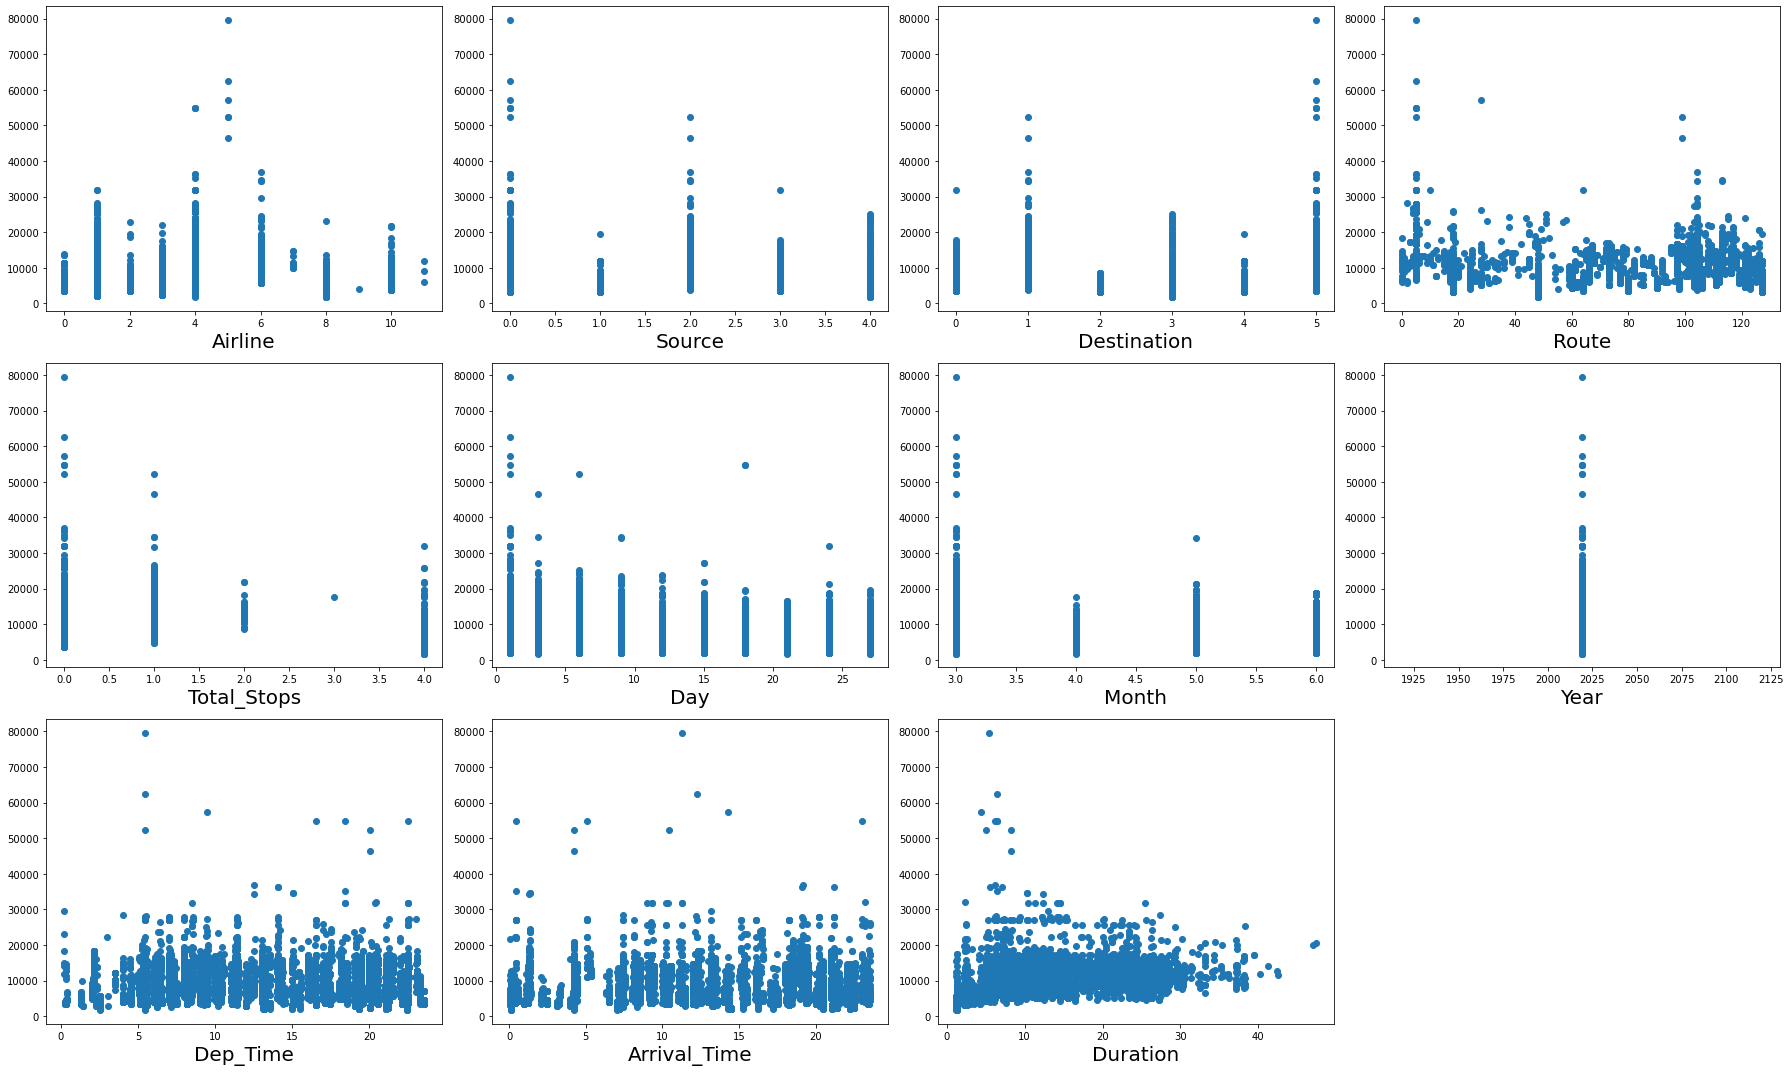

In [37]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Airline, Source, Destination, Total_stops, Day, Month has a good co-relation with Label.

In [38]:
df.skew()

Airline         0.731020
Source         -0.424188
Destination     1.244370
Route          -0.502100
Total_Stops     0.631438
Price           1.813100
Day             0.117998
Month          -0.387625
Year            0.000000
Dep_Time        0.120415
Arrival_Time   -0.371344
Duration        0.854978
dtype: float64

- Not considering skewness of categorical data.
- Duration column has skewness in the data.

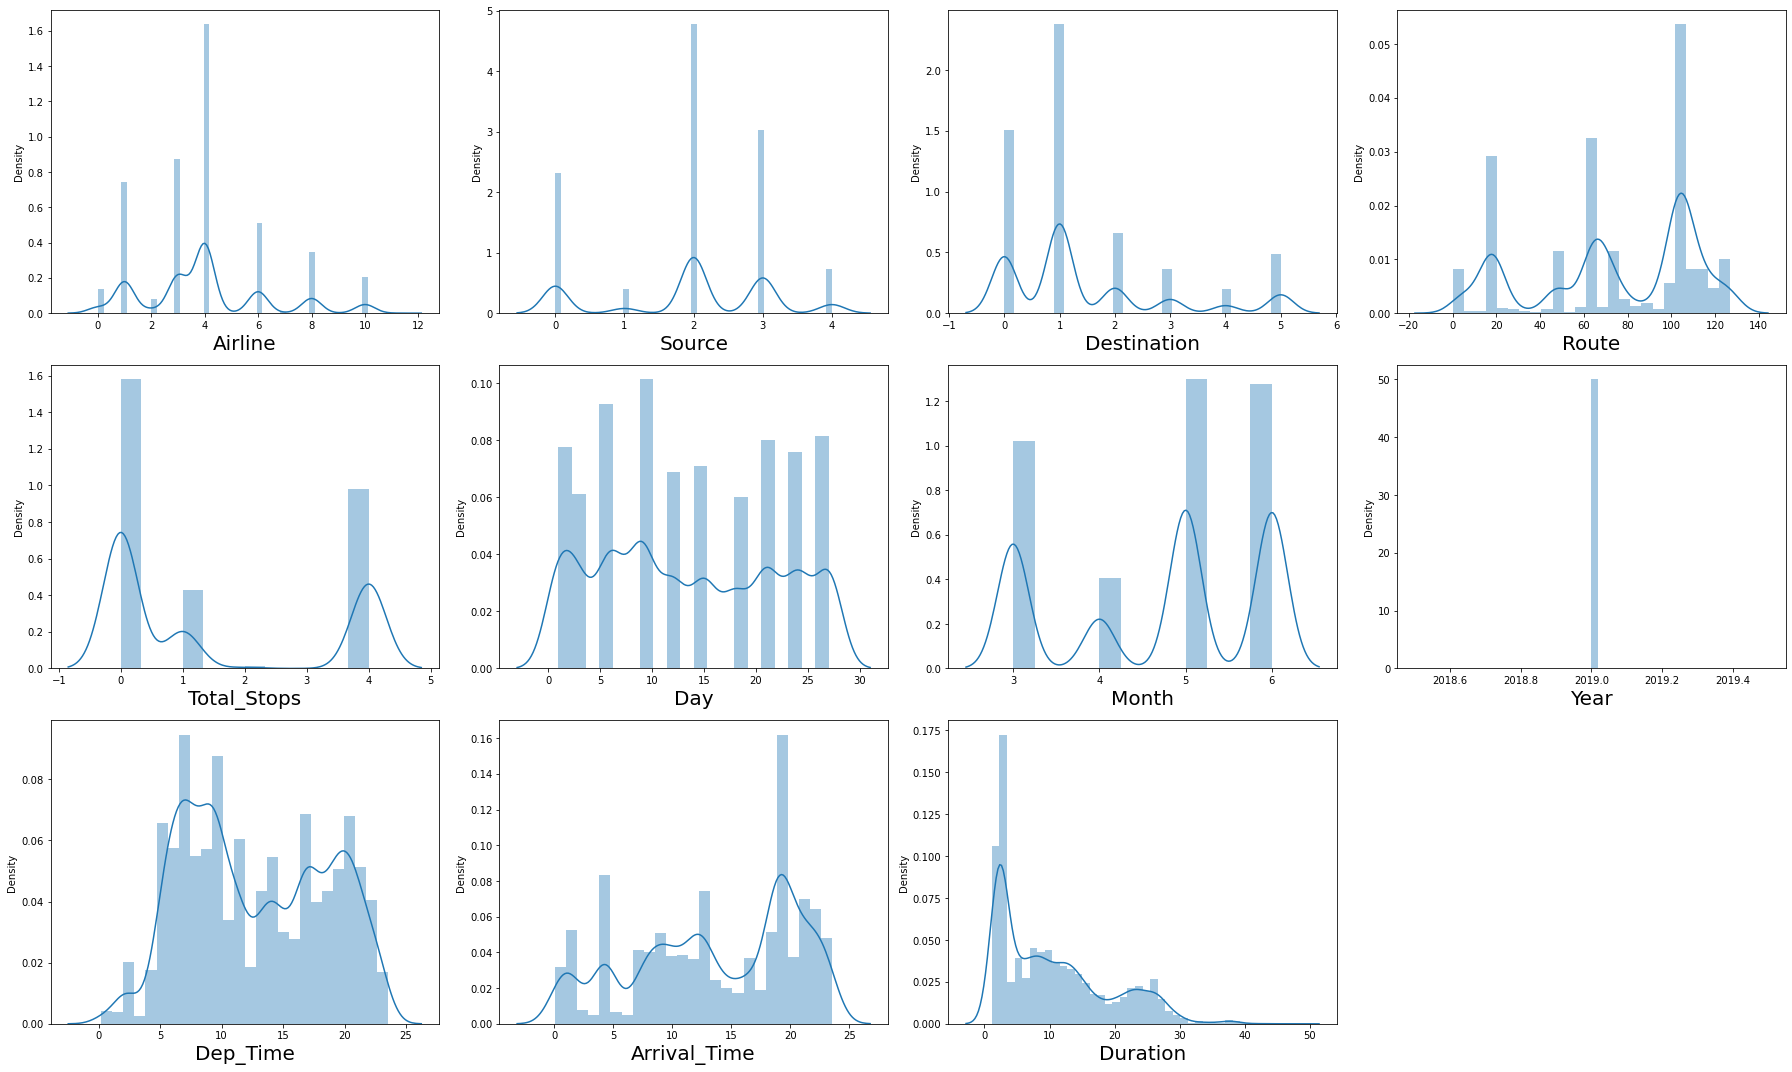

In [39]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Duration column has skewness and may have outliers in the data.

In [40]:
df.drop('Price',axis=1).corrwith(df.Price)

Airline        -0.039363
Source          0.015713
Destination    -0.071314
Route           0.164305
Total_Stops    -0.571266
Day            -0.153654
Month          -0.103424
Year                 NaN
Dep_Time        0.005894
Arrival_Time    0.022178
Duration        0.508308
dtype: float64

Source, Year, Dep_Time and Arrival_Time have less or no corelation with label

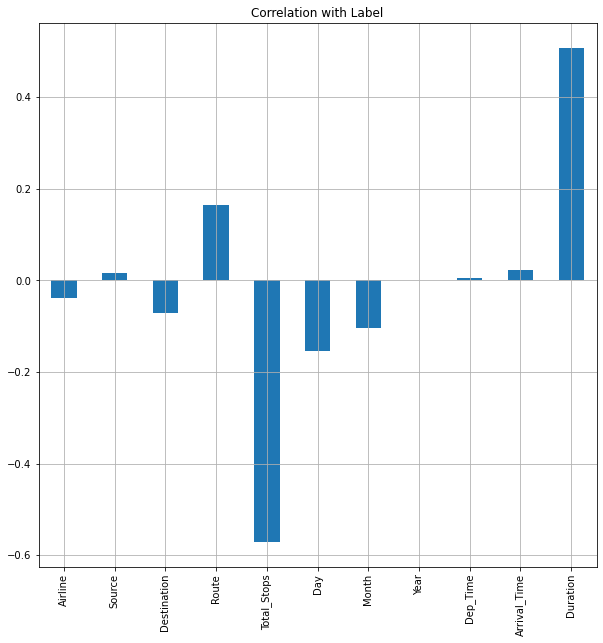

In [41]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

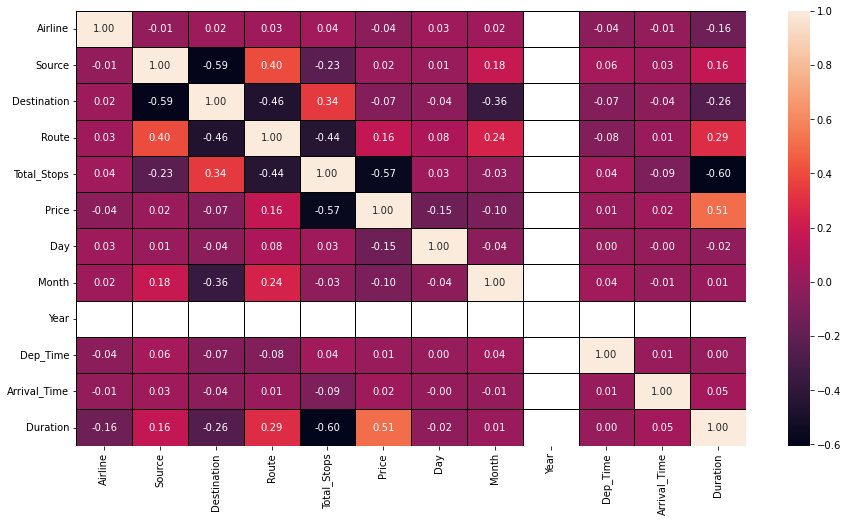

In [42]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [43]:
df = df.drop(['Year', 'Source', 'Dep_Time'],axis=1)
df_test = df_test.drop(['Year', 'Source', 'Dep_Time'],axis=1)

'Year', 'Source' and 'Dep_Time' since it has very low or no corelation with label

Multicollinearity problem does not exist in this database

In [44]:
df.columns

Index(['Airline', 'Destination', 'Route', 'Total_Stops', 'Price', 'Day',
       'Month', 'Arrival_Time', 'Duration'],
      dtype='object')

In [45]:
x = df[['Airline', 'Destination', 'Route', 'Total_Stops', 'Day',
       'Month', 'Arrival_Time', 'Duration']]

In [46]:
vif = pd.DataFrame()
vif["Features"] = x.columns

In [47]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [48]:
vif

,Features,VIF
0,Airline,3.710387
1,Destination,2.171014
2,Route,6.779653
3,Total_Stops,2.765448
4,Day,3.396938
5,Month,12.010585
6,Arrival_Time,4.467958
7,Duration,3.550852


- Month column has high VIF

In [49]:
df.describe()

,Airline,Destination,Route,Total_Stops,Price,Day,Month,Arrival_Time,Duration
count,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000,10681.000000
mean,3.966483,1.436008,74.822769,1.458290,9086.443123,13.509784,4.708735,13.595815,10.555393
std,2.352025,1.474836,36.729772,1.806399,4611.075357,8.479449,1.164345,6.836043,8.483367
min,0.000000,0.000000,0.000000,0.000000,1759.000000,1.000000,3.000000,0.050000,1.150000
25%,3.000000,0.000000,48.000000,0.000000,5277.000000,6.000000,3.000000,8.450000,2.500000
50%,4.000000,1.000000,73.000000,0.000000,8372.000000,12.000000,5.000000,14.050000,8.400000
75%,4.000000,2.000000,104.000000,4.000000,12373.000000,21.000000,6.000000,19.150000,15.300000
max,11.000000,5.000000,127.000000,4.000000,79512.000000,27.000000,6.000000,23.550000,47.400000


Database is ready to remove outliers if exist 

In [50]:
x = df.drop(['Price'],axis=1)
y = df['Price']

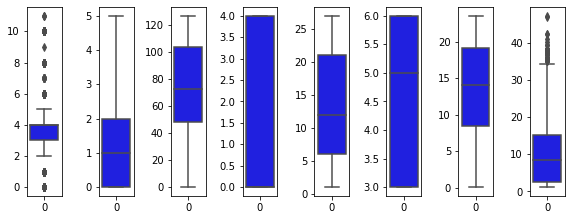

In [51]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

- Outliers are present in Airline and Duration.
- Airline is not a continuous data hence can not remove outliers from Airline column

In [52]:
old_data = (df.shape)[0]

In [53]:
q1 = df['Duration'].quantile(0.25)
q3 = df['Duration'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Duration'] > (q3+1.5*iqr))
lower = np.where(df['Duration'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from Duration column

In [54]:
new_data = (df.shape)[0]

In [55]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 73 no. of Data


In [56]:
x = df.drop(['Price'],axis=1)
y = df['Price']

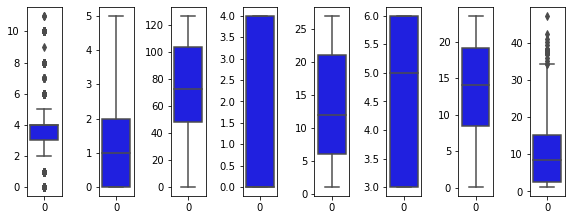

In [57]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

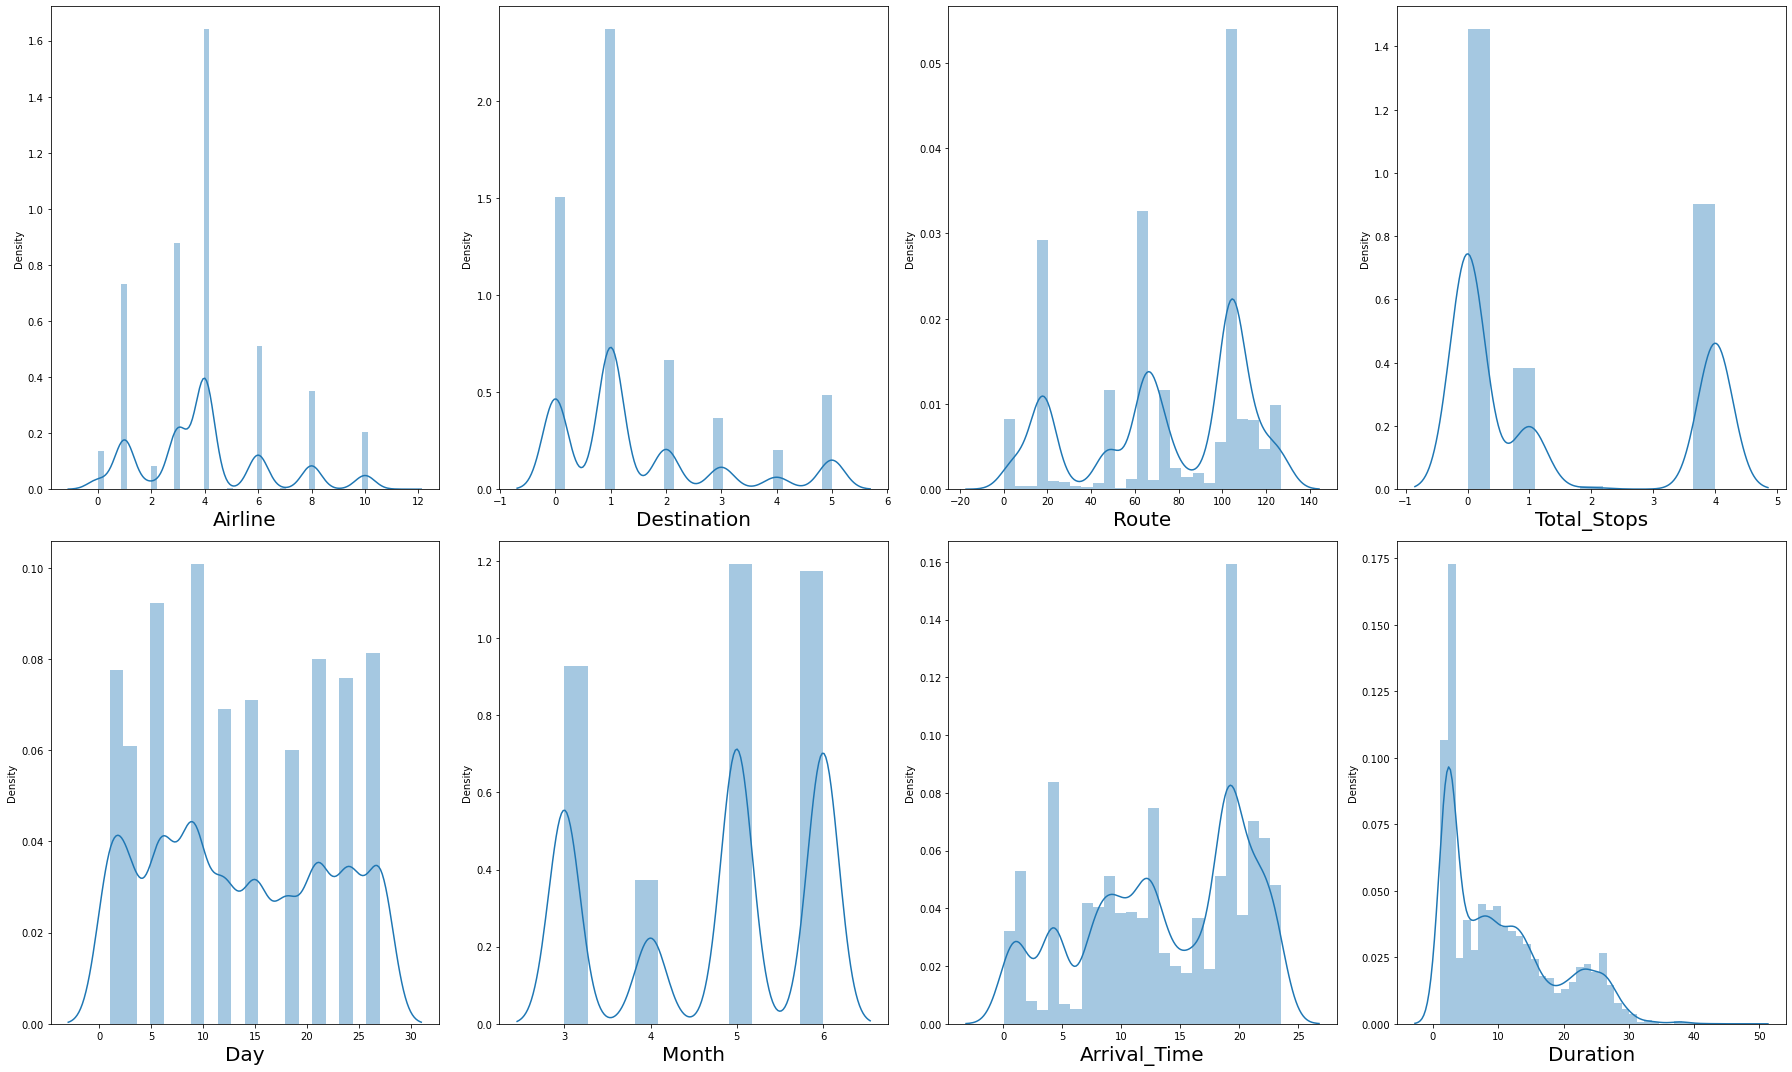

In [58]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [59]:
scaler = PowerTransformer(method='yeo-johnson')

In [60]:
df[['Duration']] = scaler.fit_transform(df[['Duration']].values)
df_test[['Duration']] = scaler.fit_transform(df_test[['Duration']].values)

In [61]:
x = df.drop(['Price'],axis=1)
y = df['Price']

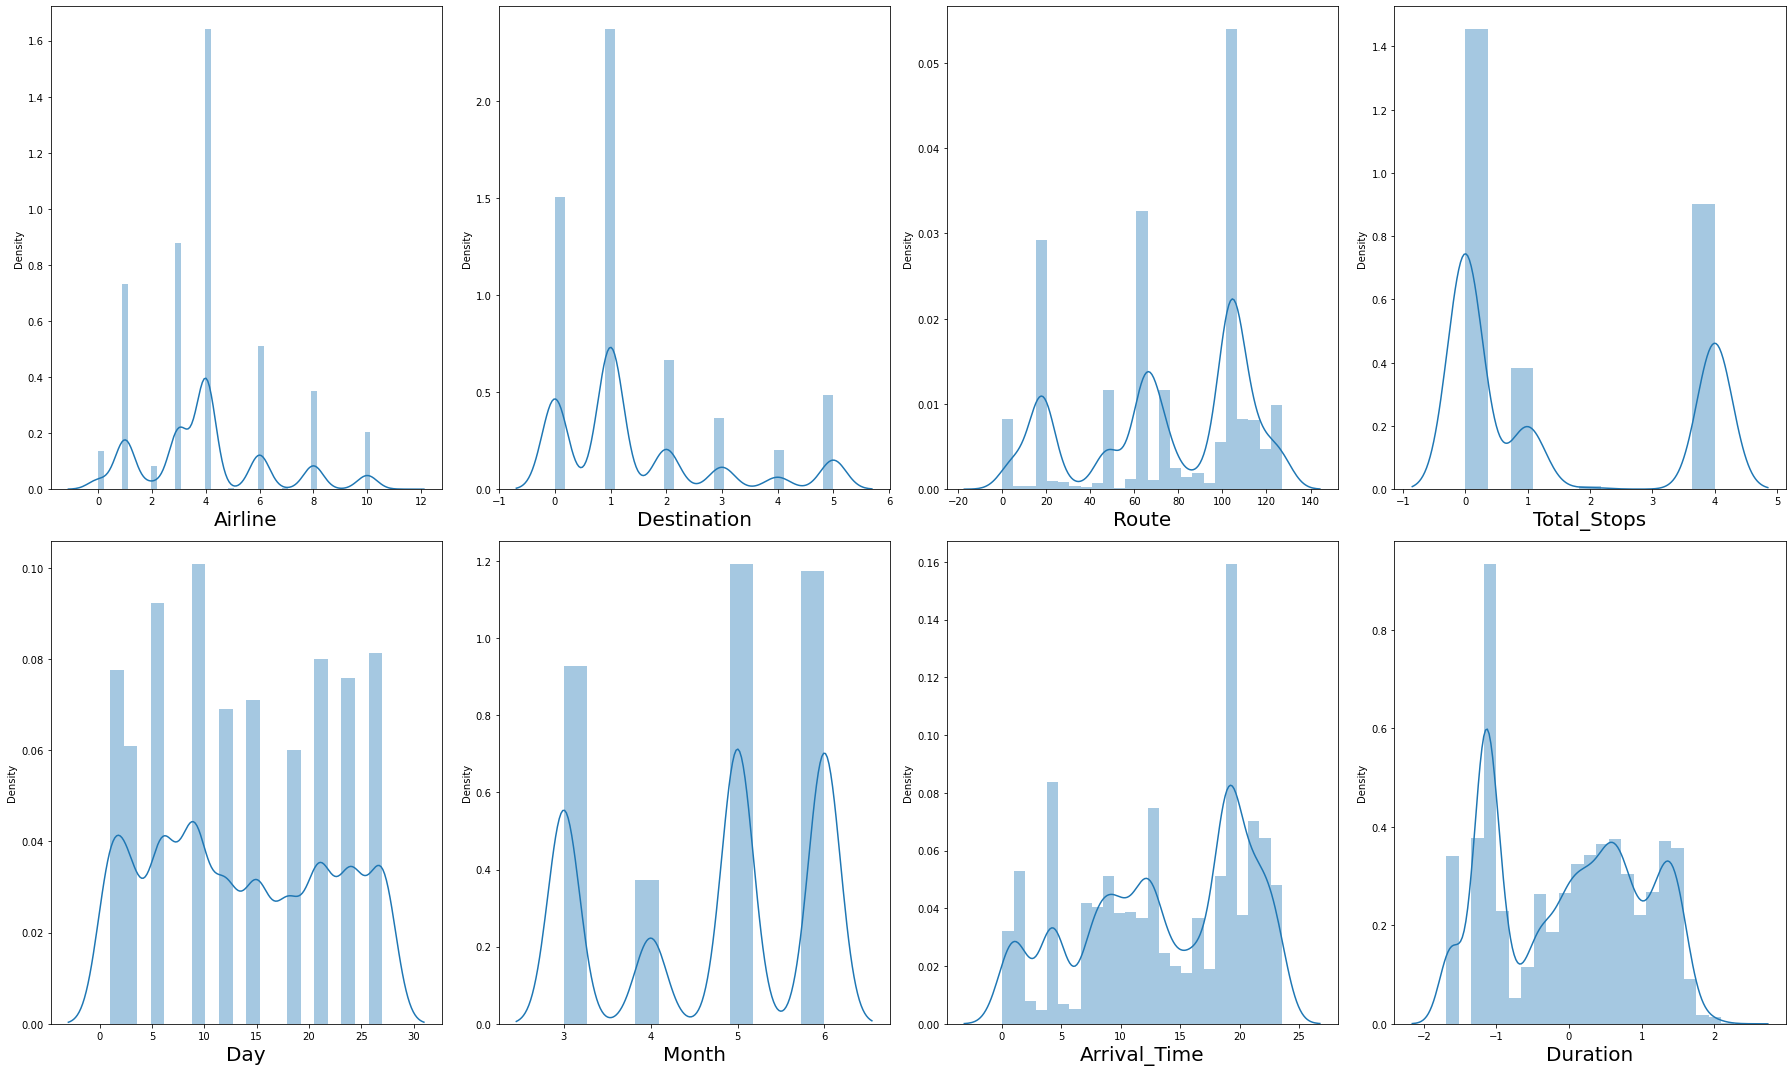

In [62]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [63]:
x = df.drop(['Price'],axis=1)
y = df['Price']

In [64]:
df

,Airline,Destination,Route,Total_Stops,Price,Day,Month,Arrival_Time,Duration
0,3.0,5.0,18.0,4.0,3897,24.0,3.0,1.10,-1.115249
1,1.0,0.0,84.0,1.0,7662,1.0,5.0,13.15,-0.065981
2,4.0,1.0,118.0,1.0,13882,9.0,6.0,4.25,1.073071
3,3.0,0.0,91.0,0.0,6218,12.0,5.0,23.30,-0.411375
4,3.0,5.0,29.0,0.0,13302,1.0,3.0,21.35,-0.579759
...,...,...,...,...,...,...,...,...,...
10603,0.0,0.0,64.0,4.0,4107,9.0,4.0,22.25,-1.185381
10604,1.0,0.0,64.0,4.0,4145,27.0,4.0,23.20,-1.167480
10605,4.0,2.0,18.0,4.0,7229,27.0,4.0,11.20,-0.955212
10606,10.0,5.0,18.0,4.0,12648,1.0,3.0,14.10,-1.149829


In [65]:
df_test

,Airline,Destination,Route,Total_Stops,Price,Day,Month,Arrival_Time,Duration
0,4.0,1.0,76.0,0.0,15998,6.0,6.0,4.25,0.349762
1,3.0,0.0,65.0,0.0,16612,12.0,5.0,10.20,-0.699552
2,4.0,1.0,76.0,0.0,25572,21.0,5.0,19.00,1.339805
3,6.0,1.0,76.0,0.0,25778,21.0,5.0,21.00,0.599102
4,0.0,2.0,16.0,4.0,16934,24.0,6.0,2.45,-1.129377
...,...,...,...,...,...,...,...,...,...
2666,1.0,0.0,51.0,0.0,14046,6.0,6.0,20.25,1.345327
2667,3.0,0.0,43.0,4.0,14086,27.0,3.0,16.55,-1.181473
2668,4.0,1.0,76.0,0.0,22720,6.0,3.0,4.25,-0.223851
2669,1.0,1.0,76.0,0.0,23544,6.0,3.0,19.15,0.786316


In [66]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [67]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.44580549008902626
At Random state 0 the testing accuracy is :- 0.3997691525039794


At Random state 1 the training accuracy is :- 0.43597375309483355
At Random state 1 the testing accuracy is :- 0.4282871650589368


At Random state 2 the training accuracy is :- 0.4313904973194116
At Random state 2 the testing accuracy is :- 0.44138628443003614


At Random state 3 the training accuracy is :- 0.44519580558875516
At Random state 3 the testing accuracy is :- 0.4037863425088626


At Random state 4 the training accuracy is :- 0.4301209688034551
At Random state 4 the testing accuracy is :- 0.4454438140225052


At Random state 5 the training accuracy is :- 0.44251382242027226
At Random state 5 the testing accuracy is :- 0.41012889346643


At Random state 6 the training accuracy is :- 0.4311637982025076
At Random state 6 the testing accuracy is :- 0.44224012499121446


At Random state 7 the training accuracy is :- 0.43564497404052194
At Random sta

In [68]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 69)

In [69]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [70]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 43.15%

===============Test Result===============
Accuracy Score: 44.15%

 mean_absolute_error 2432.4232586836056

 mean_squared_error 11282502.579606388


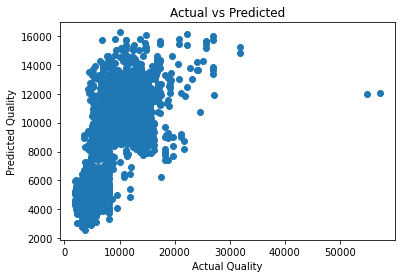

In [71]:
y_pred = reg.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [72]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.44153929766925404

In [73]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.4415392681718018

# Support Vector Regression

In [74]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 7.51%

===============Test Result===============
Accuracy Score: 9.28%

 mean_absolute_error 3264.0184805911163

 mean_squared_error 18327522.175290864


# DecisionTreeRegressor

In [75]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 97.24%

===============Test Result===============
Accuracy Score: 64.58%

 mean_absolute_error 1344.076923076923

 mean_squared_error 7155708.756808279


# AdaBoostRegressor

In [76]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 39.60%

===============Test Result===============
Accuracy Score: 32.17%

 mean_absolute_error 3090.9773690066495

 mean_squared_error 13703289.6562775


# GradientBoostingRegressor

In [77]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 79.06%

===============Test Result===============
Accuracy Score: 76.63%

 mean_absolute_error 1477.1511323081604

 mean_squared_error 4722134.771571119


# RandomForestRegressor

In [78]:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 95.43%

===============Test Result===============
Accuracy Score: 78.54%

 mean_absolute_error 1170.1945981295394

 mean_squared_error 4334852.341865489


# KNeighborsRegressor

In [79]:
knnreg = KNeighborsRegressor()
knnreg.fit(x_train,y_train)

print_score(knnreg,x_train,x_test,y_train,y_test, train=True)
print_score(knnreg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 83.78%

===============Test Result===============
Accuracy Score: 74.90%

 mean_absolute_error 1510.3747360482653

 mean_squared_error 5071610.020105581


# Findings

- LinearRegression train accuracy score 43.15% and test accuracy score 44.15%
- Support Vector Regression train accuracy score 7.51% and test accuracy score 9.28%
- DecisionTreeRegressor train accuracy score 97.24% and test accuracy score 64.58%
- AdaBoostRegressor train accuracy score 39.60% and test accuracy score 32.17%
- GradientBoostingRegressor train accuracy score 79.06% and test accuracy score 76.63%
- RandomForestRegressor train accuracy score 95.43% and test accuracy score 78.54%
- KNeighborsRegressor train accuracy score 83.78% and test accuracy score 74.90%


# Conclusion 

##### Choosing GradientBoostingRegressor model since the Accuracy score and test scores are greater and clsoe to each other.

### Saving the Model 

In [80]:
file = 'Flight_Price_Prediction.pickle'
pickle.dump(gbdt, open(file, 'wb'))

### Using test data to find accuracy 

In [91]:
x1 = df_test.drop(['Price'],axis=1)
y1 = df_test['Price']
x_test1 = scaler.fit_transform(x1)

Scaled the test data

In [92]:
x_train = X_scale
y_train = y
x_test = x_test1
y_test = y1

Did X split and Y split manually 

In [93]:
gbdt_test = GradientBoostingRegressor()
gbdt_test.fit(x_train,y_train)

print_score(gbdt_test,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt_test,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 78.97%

===============Test Result===============
Accuracy Score: -551.51%

 mean_absolute_error 11263.26522223549

 mean_squared_error 163214195.3071059


Accuracy Score is not positive and mean_absolute_error and mean_squared_error are very high hence we can not use gbdt_test model on this test data